In [101]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import cv2
import glob
import pandas as pd
import joblib

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import data, io,color
from skimage.io import imread_collection #loads a collection of images
from skimage.io import imread, imshow
from pathlib import Path

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt

## Debugging pca_rgb done!

In [102]:
def pca_rgb(imgBGR, size): # imgRGB, size
    b,g,r = cv2.split(imgRGB)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)

    return rgb_compressed

In [103]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"

In [104]:
imgRGB = cv2.imread(img_path)

In [105]:
imgRGB.shape

(471, 700, 3)

In [106]:
imgBGR = np.flip(imgRGB, -1)

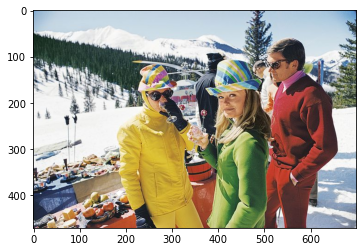

In [107]:
plt.imshow(imgBGR) # flip for reading it 

In [108]:
#Feed BGR to rgb_pca()

In [109]:
SIZE = 1
RGB_compressed = pca_rgb(imgBGR, SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


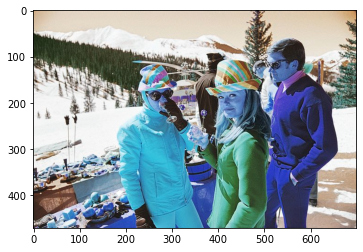

In [110]:
plt.imshow(RGB_compressed)

In [111]:
#flip after compressed for readibility
RGB_compressed = np.flip(RGB_compressed,-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


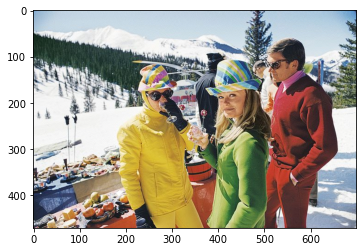

In [112]:
plt.imshow(RGB_compressed)

In [113]:
RGB_compressed.shape

(471, 700, 3)

In [114]:
RGB_compressed = np.float32(RGB_compressed) #RGB_compressed*255
#RGB_compressed = RGB_compressed*255 #

In [115]:
RGB_compressed[0][0]

array([0.472341  , 0.61338085, 0.7882768 ], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


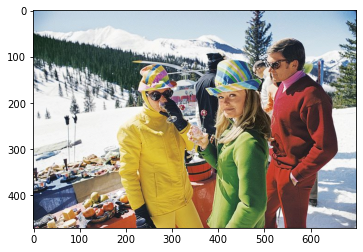

In [116]:
plt.imshow(RGB_compressed) #RGB_compressed.astype('float32')
#plt.imshow(RGB_compressed.astype('int32')) #alternative for eliminate clipping warning // okay it doesn't eliminatte

## Debugging pca_rgb() Test

In [117]:
def pca_rgb(imgBGR, size): #imgRGB, size
    b,g,r = cv2.split(imgBGR)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300) #100
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400) #400
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    #RGB_compressed = np.flip(RGB_compressed,-1)
    RGB_compressed = np.float32(RGB_compressed)
    print(RGB_compressed[0][0], RGB_compressed[0][0].dtype, )
    return RGB_compressed

In [118]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"
imgRGB = cv2.imread(img_path)
imgBGR = np.flip(imgRGB, -1)

In [119]:
test_compressed = pca_rgb(imgBGR, 1)
test_compressed = np.clip(test_compressed,0,1) #np.clip make clipping warning disappears

[0.4731174  0.61708057 0.78845984] float32


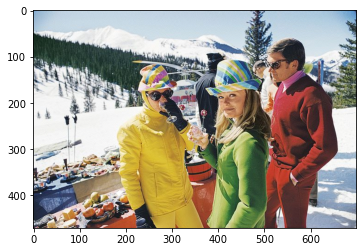

In [120]:
plt.imshow(test_compressed) #Looking good

In [121]:
test_compressed[0][0].dtype

dtype('float32')

## Test LAB separation Done!

In [231]:
imgLAB = cv2.cvtColor(test_compressed, cv2.COLOR_RGB2Lab) 

In [232]:
imgLAB[0][0]

array([ 63.598633,  -1.265625, -26.453125], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


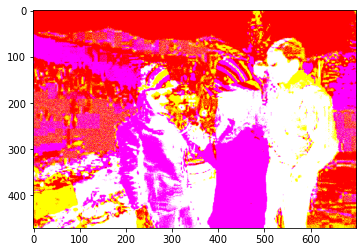

In [233]:
#before scaled
#imgLAB = np.clip(imgLAB, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB) #look kinda off

In [234]:
imgLAB[0][0][0]

63.598633

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


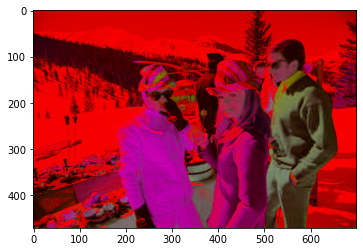

In [300]:
#scaled
imgLAB2 = imgLAB
imgLAB2_amax = np.amax(imgLAB2)
imgLAB2 = imgLAB2/np.amax(imgLAB2)
#imgLAB2 = np.clip(imgLAB2, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB2) #loook good! 

In [286]:
imgLAB2[0][0]

array([ 0.6359863 , -0.01265625, -0.26453125], dtype=float32)

### Test splitting with split function

In [237]:
L,A,B=cv2.split(imgLAB2)

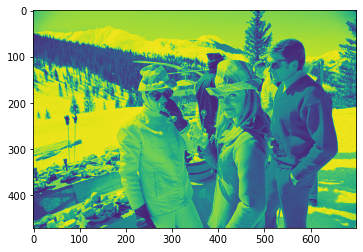

In [238]:
plt.imshow(L) # For L Channel

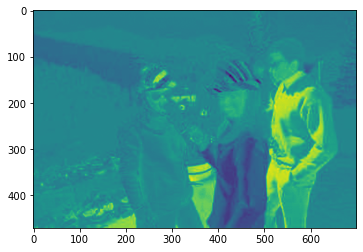

In [239]:
plt.imshow(A) # For A Channel (Here's what You need)

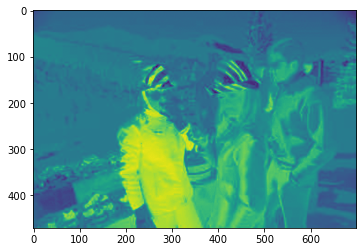

In [240]:
plt.imshow(B) # For B Channel

### Test splitting with index method

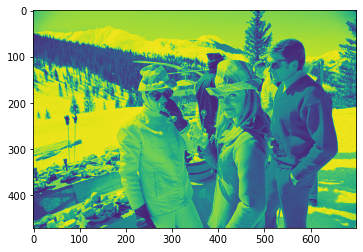

In [241]:
plt.imshow(imgLAB[:,:,0])

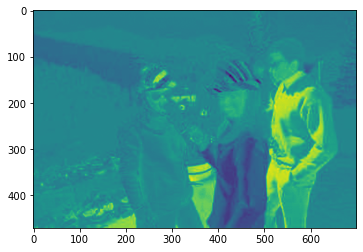

In [242]:
plt.imshow(imgLAB[:,:,1])

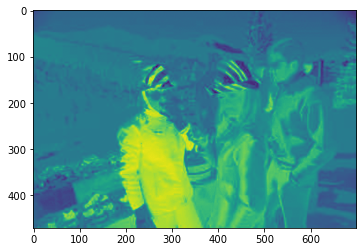

In [243]:
plt.imshow(imgLAB[:,:,2])

#### same result

## Debug Padding()

In [265]:
def pad(image):
    
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255] #[255,255,255]  1, 1, 1
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
    cv2.BORDER_CONSTANT,value=WHITE)

    return image

In [266]:
padded_image = pad(imgLAB2)

In [267]:
padded_image.shape

(1888, 1888, 3)

In [268]:
padded_image[1000][1000]

array([ 0.21722412, -0.17140625,  0.11859375], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


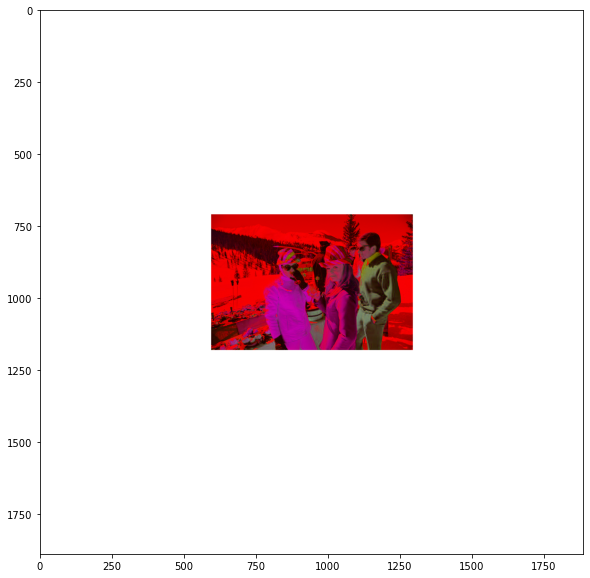

In [296]:
plt.figure(figsize=(10, 10))
plt.imshow(padded_image) # that looks right!!

In [315]:
#Try convert it to LAB again
padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab) 

In [293]:
#Somehow this splitting doesn't work
#Y = padded_image[:, :,1:]
#Y = Y / 128 #comment out when show predicted
#Y = Y.tolist()
#L_padded = padded_image[:, :, 0] #.tolist()
#A_padded = padded_image[:, :, 1]
#B_padded = padded_image[:, :, 2]

In [301]:
#scaled_padded = padded_image*imgLAB2_amax

In [316]:
#try spliting with split function // stil Yellow and pit black
L_p,A_p,B_p=cv2.split(padded_LAB)

In [317]:
A_p[1000][1000] #the data is not 0 though. That's some good news

29.328125

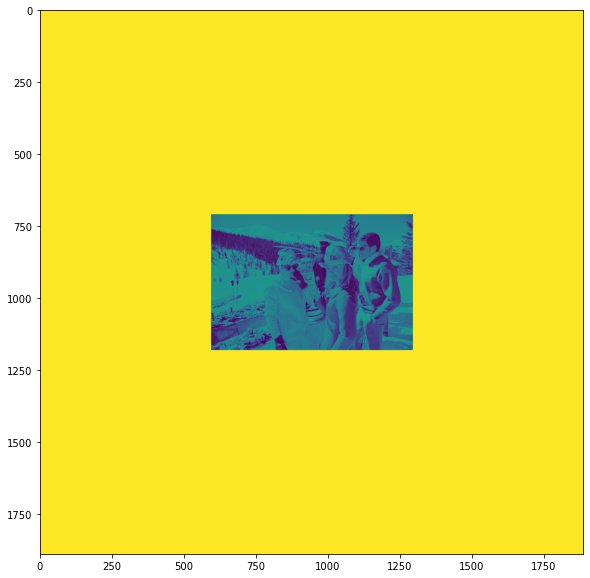

In [318]:
plt.figure(figsize=(10, 10))
plt.imshow(L_p) # scaled back to -127, 128 doesn't change the visual

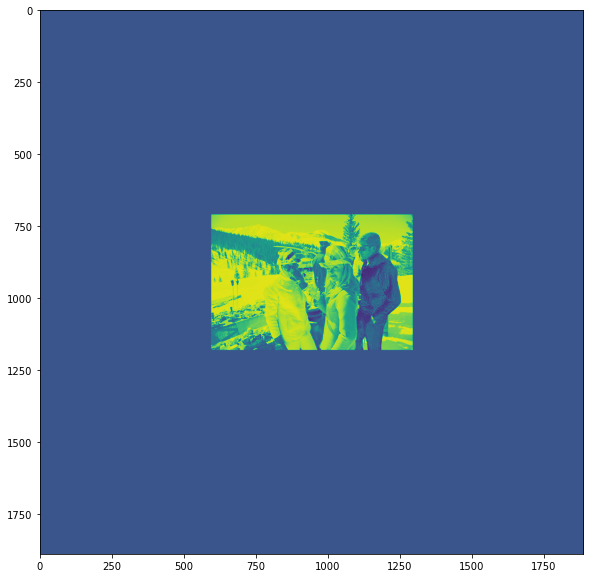

In [320]:
plt.figure(figsize=(10, 10))
plt.imshow(A_p)

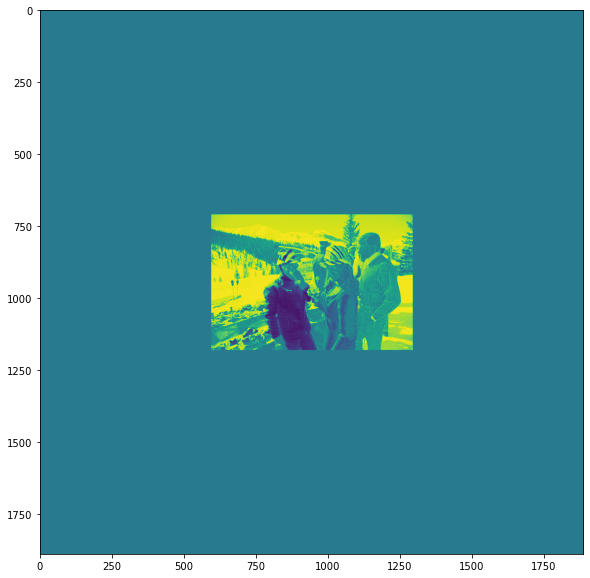

In [321]:
plt.figure(figsize=(10, 10))
plt.imshow(B_p)

### Test coprmakeborder funtion

In [278]:
padded_image_m = cv2.copyMakeBorder(imgLAB2, 100, 100, 100, 100,
    cv2.BORDER_CONSTANT,value=[255,255,255])

In [298]:
padded_image_m[400][400] # try increasing the size of border

array([0.6470337 , 0.04046875, 0.5778125 ], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


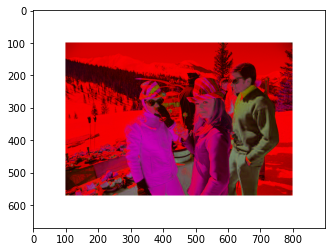

In [299]:
#padded_image  = padded_image /np.amax(padded_image)
plt.imshow(padded_image_m)

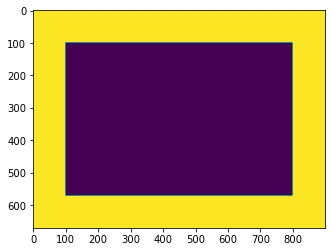

In [309]:
plt.imshow(padded_image2[:,:,0])

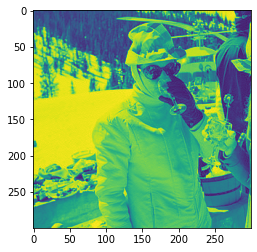

In [313]:
#try show only a slice of the image
plt.imshow(padded_image_m[200:500,200:500,0]) #??

In [276]:
padded_image_m[:,:,0][0][0]

255.0

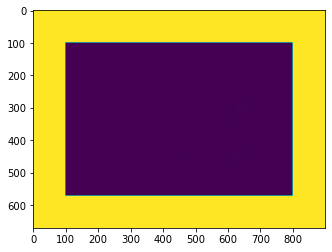

In [261]:
plt.imshow(padded_image2[:,:,1])

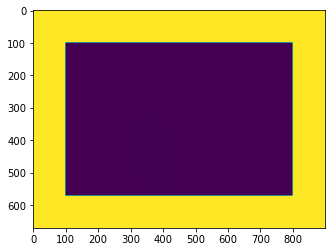

In [262]:
plt.imshow(padded_image2[:,:,2])

### Test Padding()